In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

#plotting rsme vs. #trees
#individual_index = 0
#for individual_index in range(0, 100):
#    individual_prediction = test_predictions[individual_index]
#    actual_measurement = y_test[individual_index]
#    x = individual_index
#    y = individual_prediction
#    z = actual_measurement
#    plt.scatter(x,y, c = 'red') #, label = 'predicted'
#    plt.scatter(x, z, c = 'blue') #, label = 'true'
#    x = individual_index + 1
 

In [ ]:
#Num of Patients
#num_of_patients = 412

# Load the training and test datasets the following two lines need to be changed replace the paths with the paths of the files you have stored on your computer 
train_df = pd.read_csv('./../Data/Old_Data_Safe_Here/Dataset_1/Combined_Data_1/combined_training.csv')
test_df = pd.read_csv('./../Data/Old_Data_Safe_Here/Dataset_1/Combined_Data_1/combined_test.csv')

# Specify columns to exclude
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total","Race"]

# Define features and target for training
X_train = train_df.drop(columns=excluded_columns)
y_train = train_df['ALM'] #ALM, BMD - Total, % fat - Total

# Define features for testing (we'll compare the predictions with actual ALM values later)
X_test = test_df.drop(columns=excluded_columns)
y_test = test_df['ALM']


# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators= 50, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate and print the RMSE for both sets
train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = sqrt(mean_squared_error(y_test, test_predictions))

# print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


#plotting the model
individual_index = 0
test_amt = len(test_predictions)
x = np.zeros(test_amt)
y = np.zeros(test_amt)
z = np.zeros(test_amt)

for individual_index in range(0, test_amt):
    individual_prediction = test_predictions[individual_index]
    actual_measurement = y_test[individual_index]
    x[individual_index] = individual_index
    #print(x)
    y[individual_index] = individual_prediction
    #print(y)
    z[individual_index] = actual_measurement
    #x[individual_index] = individual_index + 1
    individual_index = individual_index + 1
    #print(individual_index)

plt.figure(figsize=(12,6))  
plt.plot(x, z, 'bo-', label = 'true values',alpha = 0.7) #c = 'blue'
plt.plot(x, y, 'ro-', label = 'predicted values', alpha = 0.5) #c = 'red'
plt.title('ALM - True vs. Predicted Measurements')
plt.legend(loc = 'upper right')
plt.xlabel('Individual')
plt.ylabel('ALM')
plt.show()




In [ ]:
#initialzes all the variables we will do error analysis with
N = 15
trees = []

for n in range(1,N):
    trees.append(n)
print(len(trees))

nodes = np.zeros((N))
print(len(nodes))

for i in range(len(nodes)):
    nodes[i] = i + 1 
print(nodes)

error = np.zeros((N))

In [ ]:
#error analysis for fixed trees, varying depth
for node in nodes: 
    model = RandomForestRegressor(n_estimators=50, max_depth = int(node), random_state=42) #, 
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
    rmse_predictions = (test_rmse/y_test.mean()) * 100
    #print(tree)
    error[int(node) - 1] = rmse_predictions
    #error[int(node)] = rmse_predictions


plt.figure(figsize=(10,6))  
plt.plot(nodes, error, marker='o', linestyle='dashed', color='black', linewidth = 3, markerfacecolor='red', markersize=12)
plt.title('Depth of Tree vs. RMSE Percentage')
plt.legend(loc = 'upper right')
plt.xlabel('Depth of Tree')
plt.ylabel('RMSE as a percentage (%)')
plt.grid(False)
plt.show()

In [ ]:
#reinitializes variables for testing 
N = 25

trees = []
for n in range(1,N):
    trees.append(n)#*N_STEP
print(len(trees))


trees = np.zeros((N))
for i in range(len(trees)):
    trees[i] = i +1 
print(trees)

error = np.zeros((N))
#print(error)
#print(np.shape(trees))
#print(np.shape(error))

In [ ]:
#error analysis for fixed node depth, varying trees
for tree in trees: 
    model = RandomForestRegressor(n_estimators = int(tree), max_depth = 50, random_state=42)
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
    rmse_predictions = (test_rmse/y_test.mean()) * 100
    #print(tree)
    error[int(tree) - 1] = rmse_predictions
    #print(error)

plt.figure(figsize=(10,6))  
plt.plot(trees, error, marker='o', linestyle='dashed', color='black', linewidth = 3, markerfacecolor='red', markersize=12)
plt.title('Number of Trees vs. RMSE Percentage')
plt.legend(loc = 'upper right')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE as a percentage (%)')
plt.grid(False)
plt.show()

In [ ]:
import seaborn as sns
 
# Simulate RMSE values
np.random.seed(0)
alphas = np.arange(1, 21)
betas = np.arange(1, 11)
rmse_values = np.random.rand(len(betas), len(alphas)) * 100  # Simulated RMSE values
 
# Create a DataFrame for RMSE values
rmse_df = pd.DataFrame(rmse_values, index=betas, columns=alphas)
 
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(rmse_df, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5, cbar_kws={'label': 'RMSE'})
plt.title('Heatmap of RMSE values')
plt.xlabel('Number of Trees (Alpha)')
plt.ylabel('Depth of Tree (Beta)')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
# Number of splits
num_runs = 10
num_splits = 5
 
data = pd.read_csv('/Users/alyssablount/Documents/GitHub/Pennington_Project/Data/complete_data.csv')
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]

Percentage_Rmses = np.zeros((num_runs, num_splits))
for run in range(num_runs):
    print(f"Run {run+1}/{num_runs}")
    
    # Define k-fold cross-validation for this run
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=run)
    
    for fold, (train_index, test_index) in enumerate(kf.split(data)):
        print(f"  Fold {fold+1}/{num_splits}")

        train_df = data.iloc[train_index]
        test_df = data.iloc[test_index]
 
        # Define features and target for training
        X_train = train_df.drop(columns=excluded_columns)
        y_train = train_df['ALM'] #ALM, BMD - Total, % fat - Total

        # Define features for testing (we'll compare the predictions with actual ALM values later)
        X_test = test_df.drop(columns=excluded_columns)
        y_test = test_df['ALM']

        # Initialize and train the Random Forest model
        model = RandomForestRegressor(n_estimators= 50, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions on the training and test sets
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        # Calculate and print the RMSE for both sets
        train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))

        average_alm_test = np.mean(y_test)
        percent_rmse = (test_rmse / average_alm_test) * 100
        Percentage_Rmses[run, fold] = percent_rmse

print(Percentage_Rmses)

#random forests:
#combined % rmse: 9.431343846497725
#female % rmse: 10.941281322223665
#male % rmse: 8.2987370473286

In [ ]:
print(Percentage_Rmses)
final_error=np.mean(Percentage_Rmses)
print(final_error)

In [ ]:
#K fold cross validation for varying trees & node depth

from sklearn.model_selection import KFold
# Number of splits
num_runs = 10
num_splits = 5
 
data = pd.read_csv('/Users/alyssablount/Documents/GitHub/Pennington_Project/Data/complete_data.csv')
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]

Percentage_Rmses = np.zeros((num_runs, num_splits))
for run in range(num_runs):
    print(f"Run {run+1}/{num_runs}")
    
    # Define k-fold cross-validation for this run
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=run)
    
    for fold, (train_index, test_index) in enumerate(kf.split(data)):
        print(f"  Fold {fold+1}/{num_splits}")

        train_df = data.iloc[train_index]
        test_df = data.iloc[test_index]
 
        # Define features and target for training
        X_train = train_df.drop(columns=excluded_columns)
        y_train = train_df['ALM'] #ALM, BMD - Total, % fat - Total

        # Define features for testing (we'll compare the predictions with actual ALM values later)
        X_test = test_df.drop(columns=excluded_columns)
        y_test = test_df['ALM']

        # Initialize and train the Random Forest model
        ####### model for fixed num trees #########
        #model = RandomForestRegressor(n_estimators= 50, random_state=42)
        #model.fit(X_train, y_train)


         ##### model for varying num of trees #########

        ##### model for varying num of trees #########
        N = 25;
        trees = []

        for n in range(1,N):
            trees.append(n)
        print(len(trees))

        #make 
        trees = np.zeros((N))
        for i in range(len(trees)):
            trees[i] = i + 1 
        print(trees)

        error = np.zeros((N))
        M = 25
        nodes = []
        nodes = np.zeros((M))

        for i in range(len(nodes)):
            nodes[i] = i + 1
        print(nodes)

        Percentage_Rmses = np.zeros((N,M))

        #for fixed number of nodes: 
        for tree in trees: 
            for node in nodes: 
                model = RandomForestRegressor(n_estimators = int(tree), max_depth = int(node), random_state=42)
                model.fit(X_train, y_train)
                train_predictions = model.predict(X_train)
                test_predictions = model.predict(X_test)
                test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
                rmse_predictions = (test_rmse/y_test.mean()) * 100
                #print(tree)
                error[int(tree) - 1] = rmse_predictions
                average_alm_test = np.mean(y_test)
                percent_rmse = (test_rmse / average_alm_test) * 100
                Percentage_Rmses1[int(tree)-1, int(node)-1] = percent_rmse
                    

                # Make predictions on the training and test sets
                #train_predictions = model.predict(X_train)
                #test_predictions = model.predict(X_test)

                # Calculate and print the RMSE for both sets
                #train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
                #test_rmse = sqrt(mean_squared_error(y_test, test_predictions))

                #average_alm_test = np.mean(y_test)
                #percent_rmse = (test_rmse / average_alm_test) * 100
            #Percentage_Rmses[N,M] = percent_rmse

        #print(Percentage_Rmses)
        print(trees)
        print(Percentage_Rmses)
        print(len(Percentage_Rmses)) 

        # Make predictions on the training and test sets
        #train_predictions = model.predict(X_train)
        #test_predictions = model.predict(X_test)

        # Calculate and print the RMSE for both sets
        #train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
        #test_rmse = sqrt(mean_squared_error(y_test, test_predictions))

        #average_alm_test = np.mean(y_test)
        #percent_rmse = (test_rmse / average_alm_test) * 100
        Percentage_Rmses[run, fold] = percent_rmse

print(Percentage_Rmses)

#random forests:
#combined % rmse: 9.431343846497725
#female % rmse: 10.941281322223665
#male % rmse: 8.2987370473286

In [ ]:
train_df = pd.read_csv('./../Data/Old_Data_Safe_Here/Dataset_1/Combined_Data_1/combined_training.csv')
test_df = pd.read_csv('./../Data/Old_Data_Safe_Here/Dataset_1/Combined_Data_1/combined_test.csv')

# Specify columns to exclude
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total","Race"]

# Define features and target for training
X_train = train_df.drop(columns=excluded_columns)
y_train = train_df['ALM'] #ALM, BMD - Total, % fat - Total

# Define features for testing (we'll compare the predictions with actual ALM values later)
X_test = test_df.drop(columns=excluded_columns)
y_test = test_df['ALM']


N = 30;
trees = []

for n in range(1,N):
    trees.append(n)
print(trees)

M = 30; 
nodes = []

for m in range(1,M):
    nodes.append(m)
print(nodes)

##### model for varying num of trees #########

error = np.zeros((N))
Percentage_Rmses = np.zeros((len(trees),len(nodes)))

#for fixed number of nodes: 
for i in range(len(trees)): 
    for j in range(len(nodes)): 
        model = RandomForestRegressor(n_estimators = int(trees[i]), max_depth = int(nodes[j]), random_state=42)
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
        rmse_predictions = (test_rmse/y_test.mean()) * 100
        #print(tree)
        #error[int(tree) - 1] = rmse_predictions
        average_alm_test = np.mean(y_test)
        percent_rmse = (test_rmse / average_alm_test) * 100
        Percentage_Rmses[i, j] = percent_rmse
            

        # Make predictions on the training and test sets
        #train_predictions = model.predict(X_train)
        #test_predictions = model.predict(X_test)

        # Calculate and print the RMSE for both sets
        #train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
        #test_rmse = sqrt(mean_squared_error(y_test, test_predictions))

        #average_alm_test = np.mean(y_test)
        #percent_rmse = (test_rmse / average_alm_test) * 100
    #Percentage_Rmses[N,M] = percent_rmse

#print(Percentage_Rmses)
print(trees)
print(Percentage_Rmses)
print(len(Percentage_Rmses))

In [ ]:
import seaborn as sns
 
# Simulate RMSE values
rmse_values = Percentage_Rmses
alphas = trees
betas = nodes
 
# Create a DataFrame for RMSE values
rmse_df = pd.DataFrame(rmse_values, index=betas, columns=alphas)
 
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(rmse_df, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5, cbar_kws={'label': 'RMSE'})
plt.title('Heatmap of RMSE values')
plt.xlabel('Number of Trees')
plt.ylabel('Depth of Tree')
plt.show()

In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Below is the code for random forests 

Loading data...
[##################################################] 360/360 iterations completed
All iterations completed. Plotting the results...


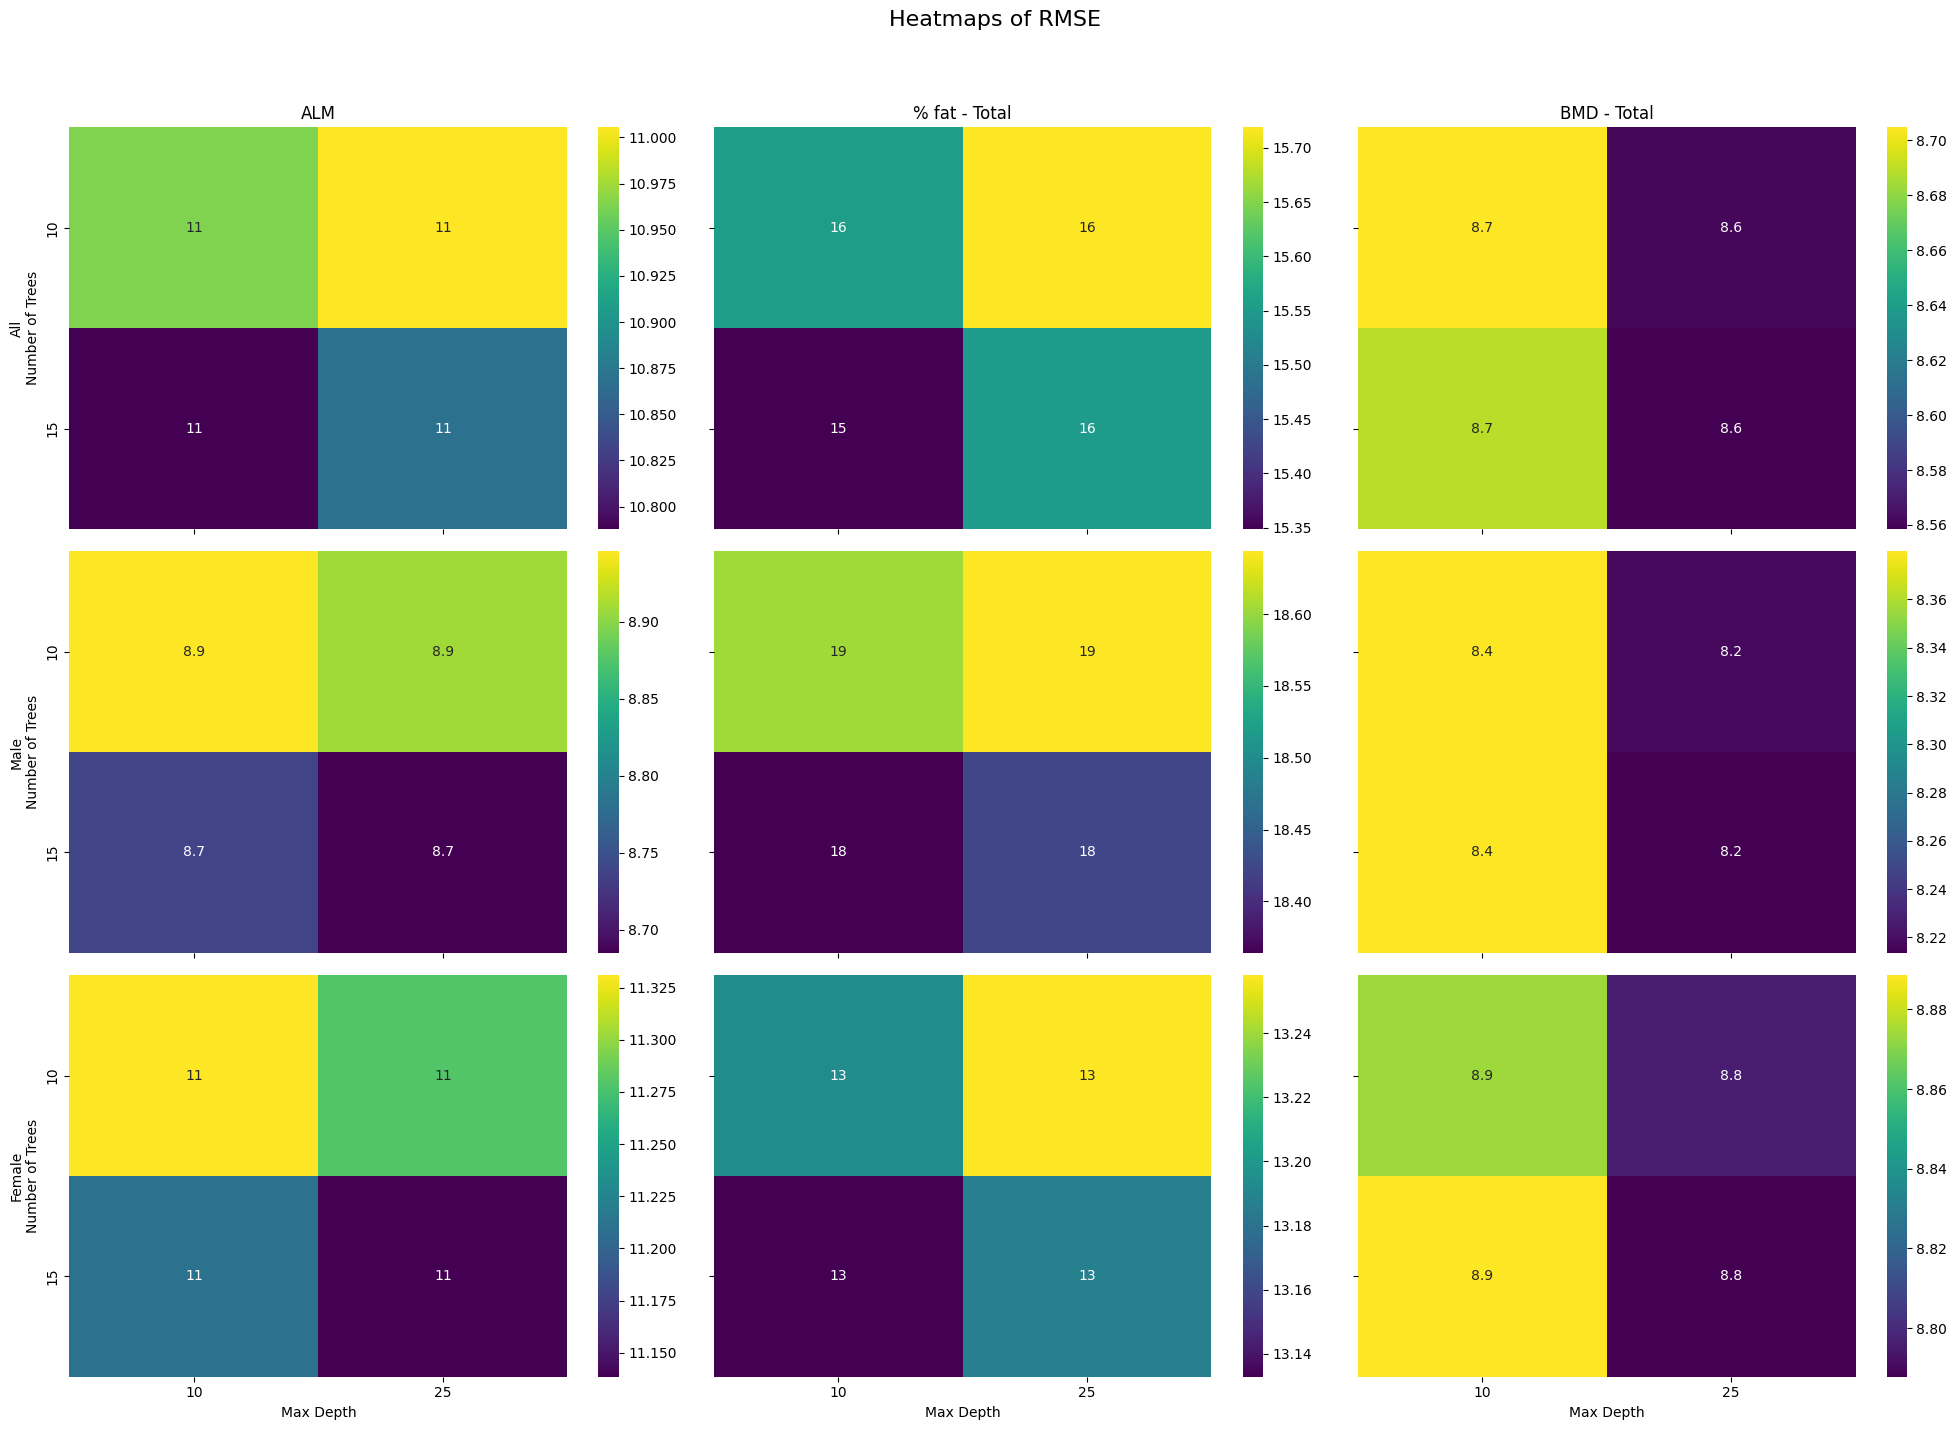

In [2]:
# Imports
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

# for your patience so you know how far you have and don't cancel it right before it is done (lol)
def update_progress_bar(completed, total, bar_length=50):
    progress = int(bar_length * completed / total)
    bar = '#' * progress + '_' * (bar_length - progress)
    print(f'[{bar}] {completed}/{total} iterations completed', end='\r')

print("Loading data...")
train_df = pd.read_csv('./../Data/complete_data.csv')

sexes = ['All', 'Male', 'Female']
target_features = ["ALM", "% fat - Total", "BMD - Total"]

# !! Modify these parameters !!
# again, these are small now for computational testing reasons
trees = [10, 15]
depths = [10, 25]
num_runs = 2
num_splits = 5
# !! Modify these parameters !!

excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]

# Total iterations calculation
total_iterations = len(sexes) * len(trees) * len(depths) * len(target_features) * num_runs * num_splits
completed_iterations = 0

results_tensor = np.zeros((len(sexes), len(target_features), len(trees), len(depths)))

# Loop over sexes
for sex_idx, sex in enumerate(sexes):
    
    filtered_df = train_df if sex == 'All' else train_df[train_df['Gender'] == sex]
    
    for target_idx, target_feature in enumerate(target_features):
        for tree_idx, tree in enumerate(trees):
            for depth_idx, depth in enumerate(depths):
                rmses = []
                
                for run in range(num_runs):
                    kf = KFold(n_splits=num_splits, shuffle=True, random_state=run)
                    
                    X = filtered_df.drop(columns=excluded_columns)
                    y = filtered_df[target_feature]
                    # making the pipeline without the scaler
                    model = make_pipeline(XGBRegressor(n_estimators=tree, max_depth=depth))
                    
                    for train_index, test_index in kf.split(X):
                        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                        
                        model.fit(X_train, y_train)
                        predictions = model.predict(X_test)
                        rmse = 100 * sqrt(mean_squared_error(y_test, predictions)) / np.sqrt(np.mean(np.square(y_test)))
                        rmses.append(rmse)

                        completed_iterations += 1
                        update_progress_bar(completed_iterations, total_iterations)
                
                avg_rmse = np.mean(rmses)
                results_tensor[sex_idx, target_idx, tree_idx, depth_idx] = avg_rmse

print('\nAll iterations completed. Plotting the results...')

# Plotting
fig, axs = plt.subplots(len(sexes), len(target_features), figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Heatmaps of RMSE', fontsize=16)

for sex_idx, sex in enumerate(sexes):
    for target_idx, target_feature in enumerate(target_features):
        heatmap_data = results_tensor[sex_idx, target_idx]
        ax = axs[sex_idx, target_idx]
        sns.heatmap(heatmap_data, annot=True, xticklabels=depths, yticklabels=trees, cmap='viridis', ax=ax)
        if sex_idx == 0:
            ax.set_title(f'{target_feature}')
        if target_idx == 0:
            ax.set_ylabel(f'{sex}\nNumber of Trees')
        if sex_idx == len(sexes) - 1:
            ax.set_xlabel('Max Depth')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
